In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv("machine.data.csv", header=None)

In [111]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253


In [112]:
df.shape

(209, 10)

In [113]:
df.dropna(inplace=True)

In [114]:
df.shape

(209, 10)

In [115]:
col_names = ['Vendor Name','Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH','CHMIN', 'CHMAX', 'PRP', 'ERP' ]

df.columns = col_names

In [116]:
df.head(3)

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor Name  209 non-null    object
 1   Model Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 18.0+ KB


In [118]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000
mean,203.8230,"2,867.9809","11,796.1531",25.2057,4.6986,18.2679,105.6220,99.3301
std,260.2629,"3,878.7428","11,726.5644",40.6287,6.8163,25.9973,160.8307,154.7571
min,17.0000,64.0000,64.0000,0.0000,0.0000,0.0000,6.0000,15.0000
25%,50.0000,768.0000,"4,000.0000",0.0000,1.0000,5.0000,27.0000,28.0000
50%,110.0000,"2,000.0000","8,000.0000",8.0000,2.0000,8.0000,50.0000,45.0000
75%,225.0000,"4,000.0000","16,000.0000",32.0000,6.0000,24.0000,113.0000,101.0000
max,"1,500.0000","32,000.0000","64,000.0000",256.0000,52.0000,176.0000,"1,150.0000","1,238.0000"


In [119]:
categorical = [col for col in df.columns if df[col].dtype == 'O']
categorical

['Vendor Name', 'Model Name']

In [120]:
df[categorical].head()

,Vendor Name,Model Name
0,adviser,32/60
1,amdahl,470v/7
2,amdahl,470v/7a
3,amdahl,470v/7b
4,amdahl,470v/7c


In [121]:
df["Vendor Name"].value_counts()

ibm             32
nas             19
sperry          13
honeywell       13
ncr             13
siemens         12
cdc              9
amdahl           9
burroughs        8
harris           7
dg               7
hp               7
c.r.d            6
magnuson         6
ipl              6
dec              6
formation        5
prime            5
cambex           5
perkin-elmer     3
nixdorf          3
gould            3
bti              2
basf             2
wang             2
apollo           2
adviser          1
four-phase       1
microdata        1
sratus           1
Name: Vendor Name, dtype: int64

In [122]:
print("Number of Unique Model Name", len(df["Model Name"].unique()))
print("Total Observations", len(df))

Number of Unique Model Name 209
Total Observations 209


In [123]:
numerical = [col for col in df.columns if df[col].dtype != 'O']
print("Numerical columns are: ", numerical)

Numerical columns are:  ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']


In [124]:
df[numerical].head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132




We can see that we have eight numerical variables in the dataset. All the eight numerical variables are of discrete type.

On closer inspection, we find that PRP is a redundant column in the dataframe. It denotes published relative performance. Our target is to predict estimated relative performance. So, we should delete PRP from the dataframe.

Summary : types of variables

    There are 2 categorical variables and 8 numerical variables.

    The 2 categorical variables, Vendor Name and Model Name are 2 non-predictive attributes as given in the dataset description. So, I do not use them for model building.

    All of the 8 numerical variables are of discrete type.

    Out of the 8 numerical variables, PRP is the linear regression's guess. It is redundant column. I do not use it for model building.

    ERP (estimated relative performance is the goal field). It is the target variable.



In [125]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.0000,-0.3356,-0.3786,-0.3210,-0.3011,-0.2505,-0.3071,-0.2884
MMIN,-0.3356,1.0000,0.7582,0.5347,0.5172,0.2669,0.7949,0.8193
MMAX,-0.3786,0.7582,1.0000,0.5380,0.5605,0.5272,0.8630,0.9012
CACH,-0.3210,0.5347,0.5380,1.0000,0.5822,0.4878,0.6626,0.6486
CHMIN,-0.3011,0.5172,0.5605,0.5822,1.0000,0.5483,0.6089,0.6106
CHMAX,-0.2505,0.2669,0.5272,0.4878,0.5483,1.0000,0.6052,0.5922
PRP,-0.3071,0.7949,0.8630,0.6626,0.6089,0.6052,1.0000,0.9665
ERP,-0.2884,0.8193,0.9012,0.6486,0.6106,0.5922,0.9665,1.0000


In [126]:
corr_matrix["ERP"].sort_values(ascending=False)

ERP      1.0000
PRP      0.9665
MMAX     0.9012
MMIN     0.8193
CACH     0.6486
CHMIN    0.6106
CHMAX    0.5922
MYCT    -0.2884
Name: ERP, dtype: float64



# Interpretation of correlation coefficient

The correlation coefficient ranges from -1 to +1.

When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between ERP and MMAX.

When it is clsoe to -1, it means that there is a strong negative correlation. So, there is a small negative correlation between ERP and MYCT.


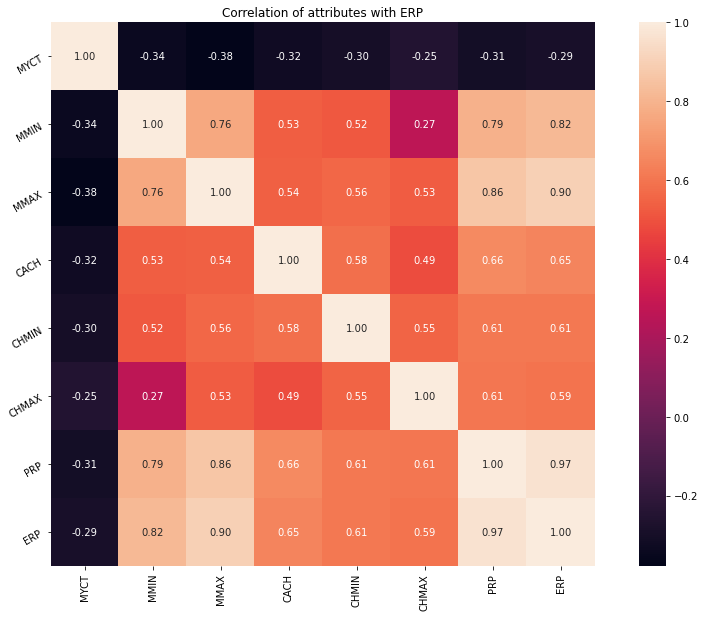

In [127]:
plt.figure(figsize=(16, 10))
plt.title("Correlation of attributes with ERP")
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt=".2f", linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [128]:
df.isna().sum()

Vendor Name    0
Model Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [129]:
# outlies in discrete variables

for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    print(df[var].value_counts() / np.float(len(df)))



50     0.1196
140    0.0431
300    0.0383
26     0.0383
38     0.0335
320    0.0335
56     0.0335
180    0.0335
800    0.0287
75     0.0287
105    0.0287
200    0.0287
143    0.0239
900    0.0239
160    0.0239
400    0.0191
60     0.0191
29     0.0191
25     0.0191
23     0.0191
110    0.0191
92     0.0144
100    0.0144
250    0.0144
115    0.0144
125    0.0144
30     0.0144
480    0.0144
225    0.0144
330    0.0144
810    0.0096
1500   0.0096
72     0.0096
40     0.0096
57     0.0096
59     0.0096
17     0.0096
133    0.0096
1100   0.0096
240    0.0096
700    0.0096
64     0.0048
220    0.0048
203    0.0048
185    0.0048
175    0.0048
167    0.0048
35     0.0048
150    0.0048
116    0.0048
124    0.0048
70     0.0048
48     0.0048
112    0.0048
52     0.0048
98     0.0048
350    0.0048
600    0.0048
84     0.0048
90     0.0048
Name: MYCT, dtype: float64
2000    0.2584
1000    0.1818
4000    0.1053
512     0.1053
8000    0.0957
256     0.0622
768     0.0478
16000   0.0335
262     0.009

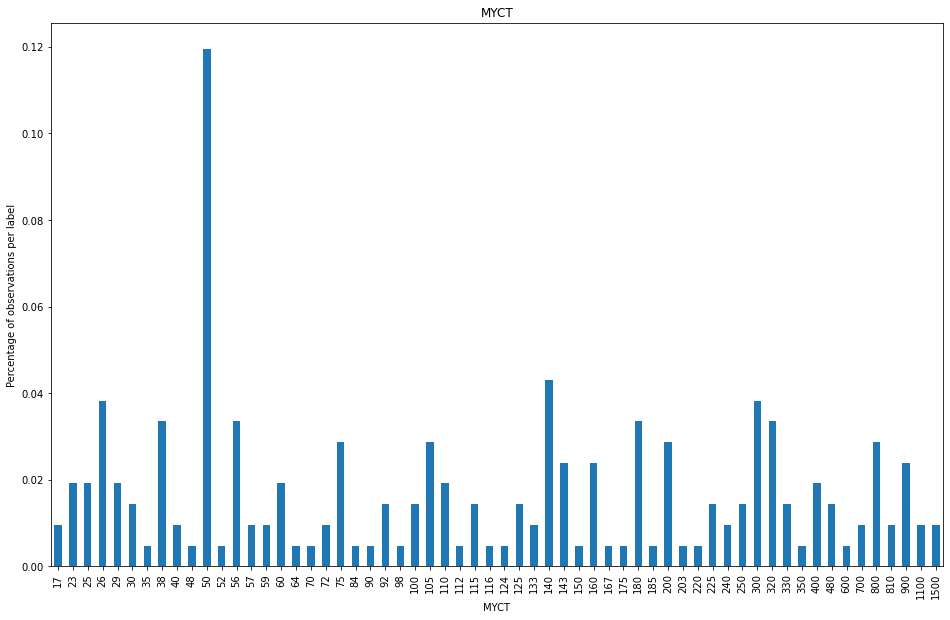

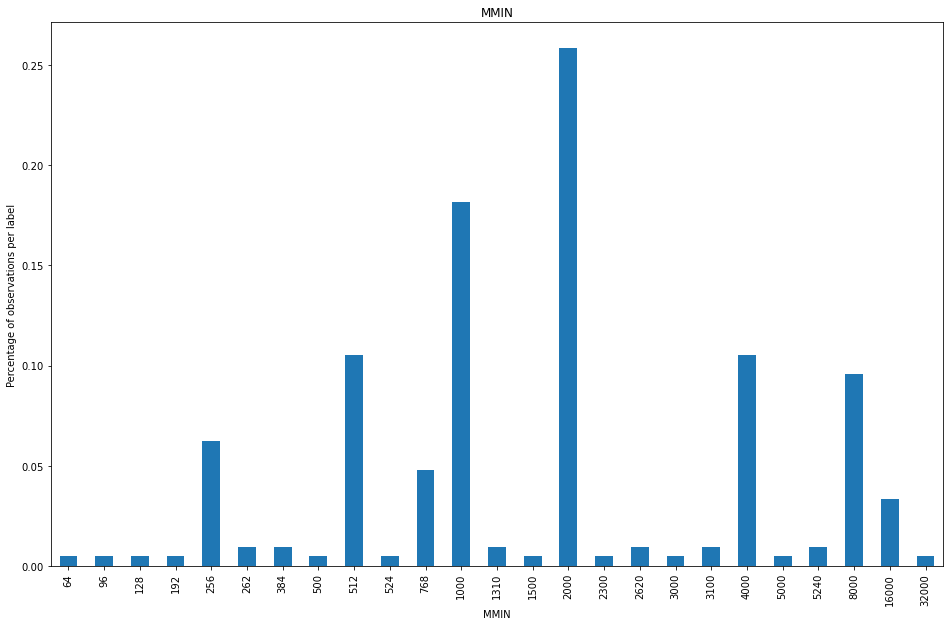

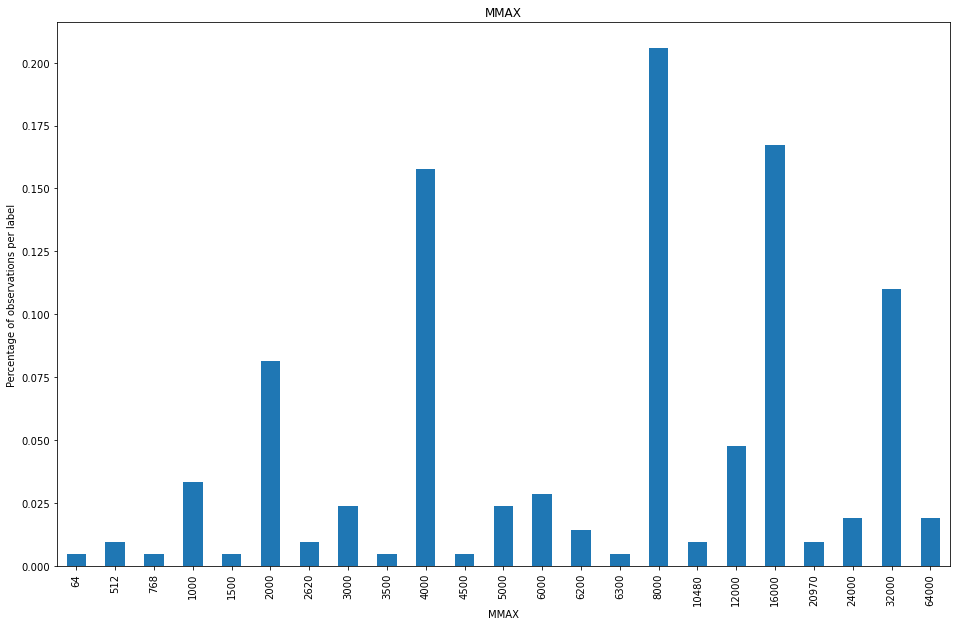

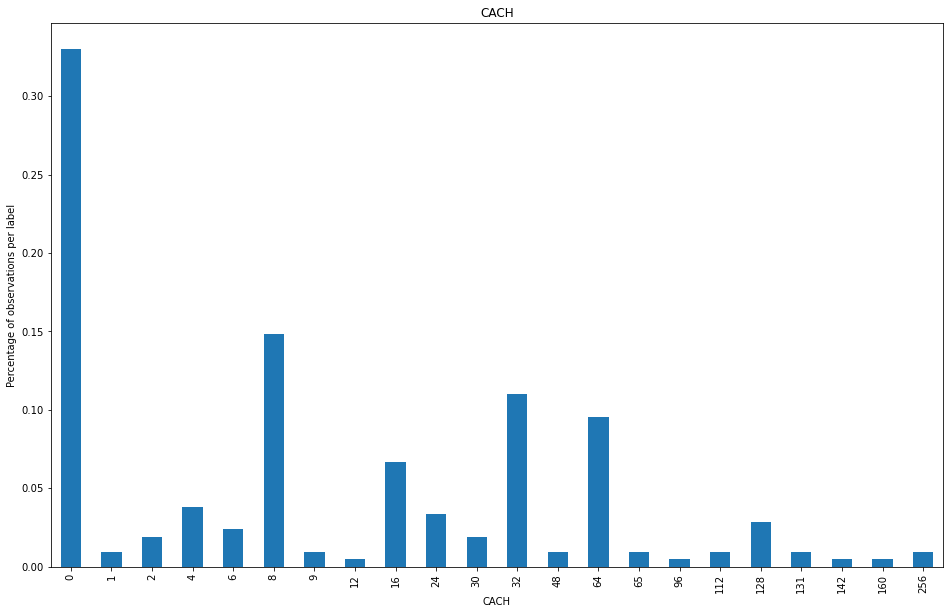

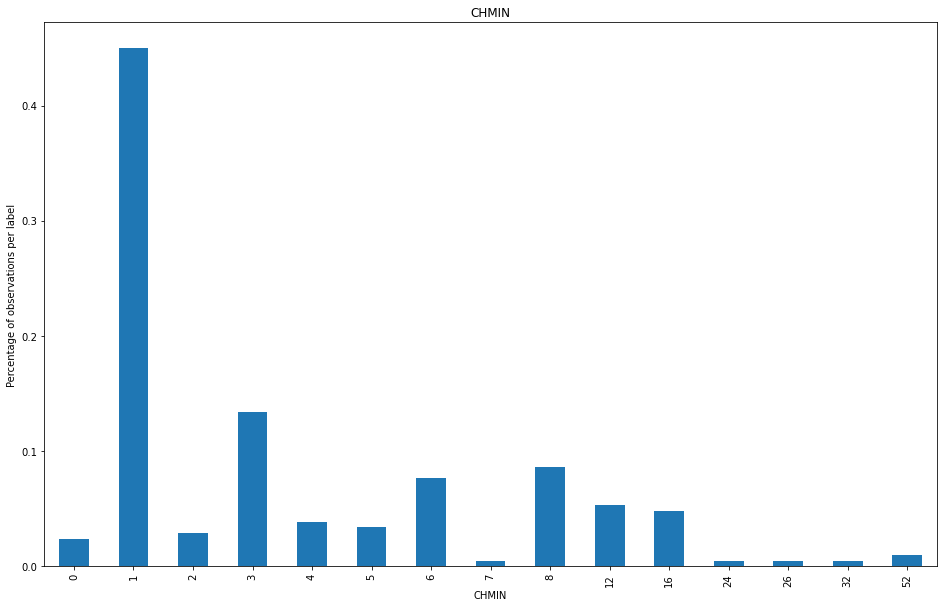

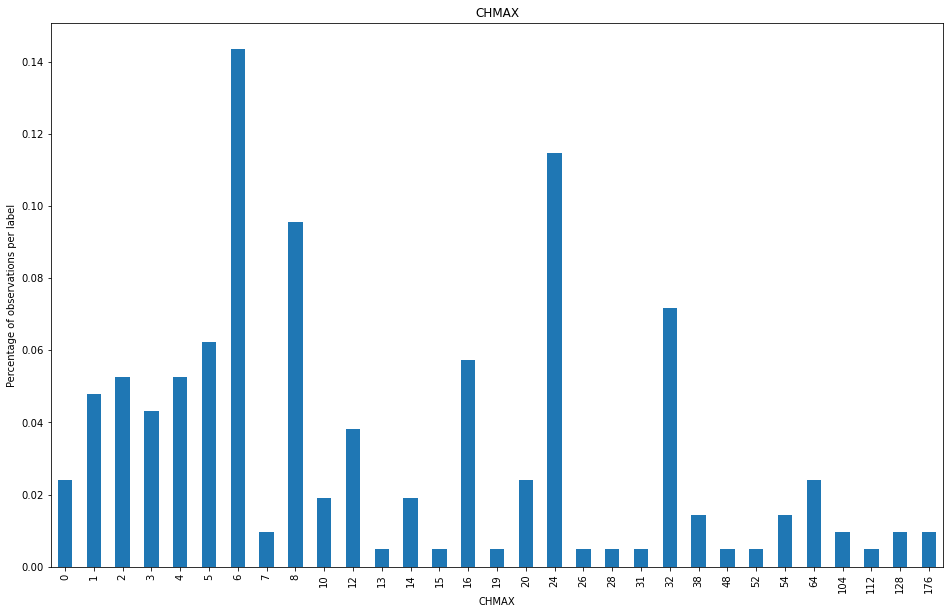

In [130]:
# detect outliers in discrete variables

for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

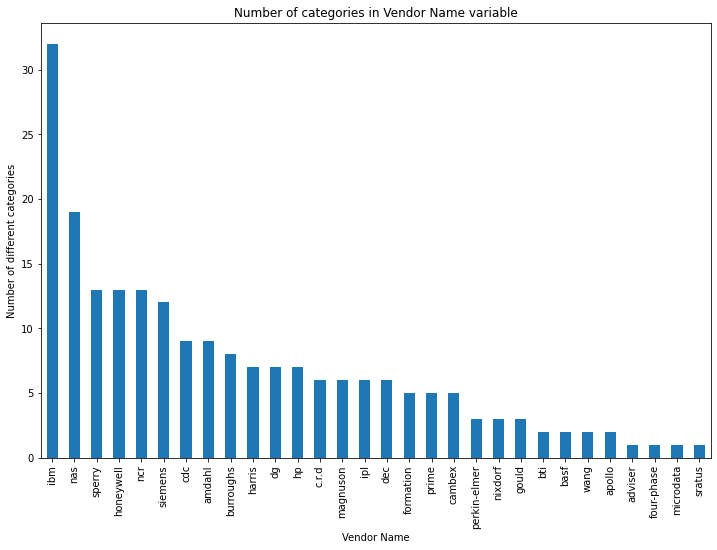

In [131]:


# plot the categorical variable

plt.figure(figsize=(12,8))
(df['Vendor Name'].value_counts()).plot.bar()
plt.title('Number of categories in Vendor Name variable')
plt.xlabel('Vendor Name')
plt.ylabel('Number of different categories')
plt.show()



In [132]:
df_cat = df.iloc[:,:2]
df_num = df.iloc[:,2:]

# Select the predictor and target variables

In [133]:
X = df_num.iloc[:,:6]
Y = df_num.iloc[:,-1]

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [135]:
x_train.shape, y_train.shape

((146, 6), (146,))

In [136]:
x_test.shape, y_test.shape

((63, 6), (63,))

In [137]:
x_train.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,146.0000,146.0000,146.0000,146.0000,146.0000,146.0000
mean,205.8082,"2,799.9726","11,741.2055",25.5685,4.5479,19.2397
std,249.6152,"3,865.5077","11,879.6456",41.6903,6.5770,28.8810
min,17.0000,64.0000,64.0000,0.0000,0.0000,0.0000
25%,50.0000,512.0000,"4,000.0000",0.0000,1.0000,5.0000
50%,115.5000,"2,000.0000","8,000.0000",8.0000,1.5000,8.0000
75%,240.0000,"4,000.0000","16,000.0000",32.0000,6.0000,24.0000
max,"1,500.0000","32,000.0000","64,000.0000",256.0000,52.0000,176.0000


In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [139]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [140]:
y_pred = lr.predict(x_test)

In [141]:
lr.predict(x_test)[0:5]

array([ 53.25899879,  -7.30914167,  85.61134478, 333.46353054,
        88.17105392])

In [142]:
print("Number of coefficients:", len(lr.coef_))

print("Estimated coefficients: {}".format(lr.coef_))

print("Estimated intercept: {}".format(lr.intercept_))

Number of coefficients: 6
Estimated coefficients: [17.70202595 59.11241774 78.35042681 16.53981449 -0.35410978 38.97256261]
Estimated intercept: 100.0


In [147]:
dataset = list(zip(pd.DataFrame(x_train).columns, lr.coef_))
pd.DataFrame(data = dataset, columns = ['Features', 'Estimated Coefficients']).set_index('Features')

,Estimated Coefficients
Features,
0,17.7020
1,59.1124
2,78.3504
3,16.5398
4,-0.3541
5,38.9726


In [148]:
# RMSE(Root Mean Square Error)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 37.99


In [149]:
# R2 Score

from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.92


In [151]:
# Evaluating training set performance

print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))

Training set score: 0.91


In [152]:
# Evaluating test set performance

print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))

Test set score: 0.92



iv. Cross validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model.

In cross-validation, we split the training data into several subgroups. Then we use each of them in turn to evaluate the model fitted on the remaining portion of the data.

It helps us to obtain reliable estimates of the model's generalization performance. So, it helps us to understand how well the model performs on unseen data.

We can perform cross validation as follows:-


In [153]:
# import the library
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr, X, Y, cv=5)

In [154]:


# print the 5-fold cross-validation scores
print(cv_scores.round(4))



[ 0.8484 -0.864   0.7149  0.8755  0.7707]


In [155]:
# print the avarage 5-fold cross-validation scores
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(4)))

Average 5-Fold CV Score: 0.4691


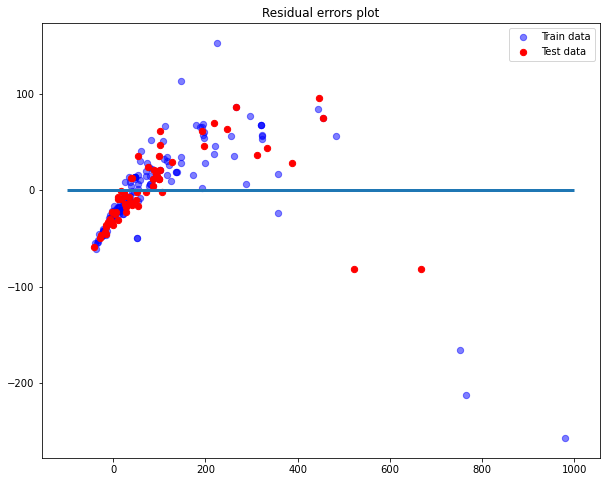

In [157]:
# Plot for residual error

# adjust the figure size
plt.figure(figsize=(10,8))

# plotting residual errors in training data
plt.scatter(lr.predict(x_train), lr.predict(x_train) - y_train, c = 'b', s = 40, label = 'Train data', alpha = 0.5)

# plotting residual errors in test data
plt.scatter(lr.predict(x_test), lr.predict(x_test) - y_test, c = 'r', s = 40, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = -100, xmax = 1000, linewidth = 3)

# plotting legend
plt.legend(loc = 'upper right')

# plot title
plt.title("Residual errors plot")

# function to show plot
plt.show()

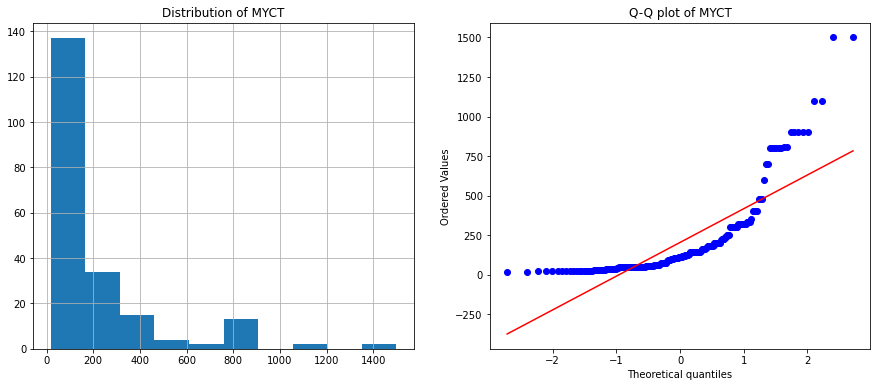

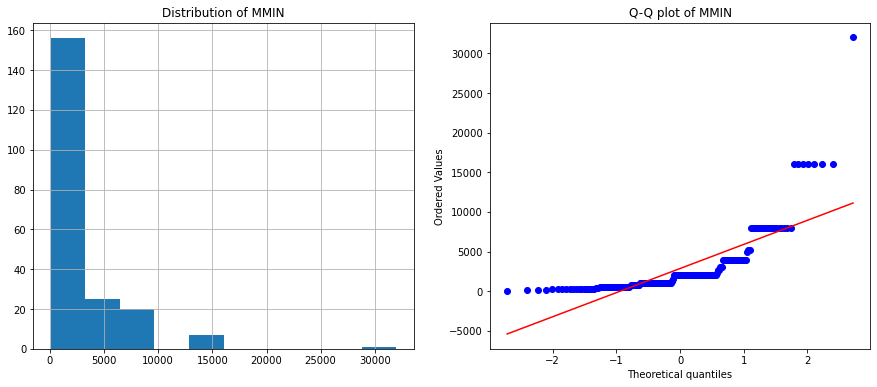

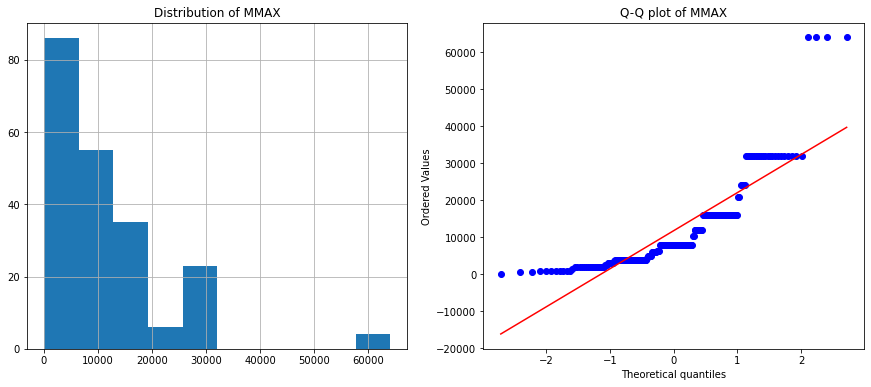

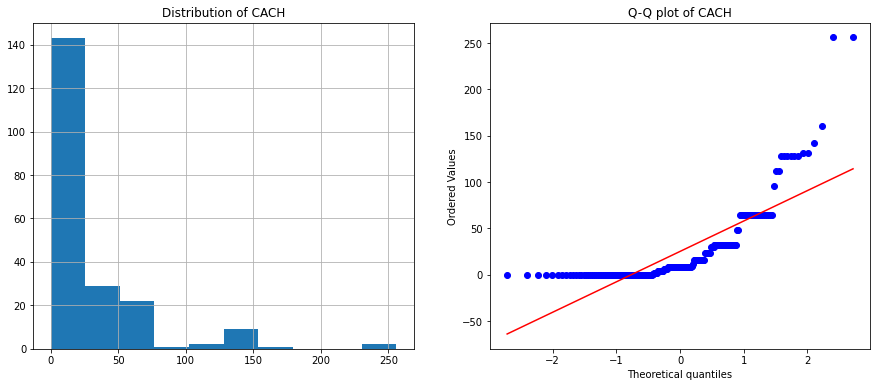

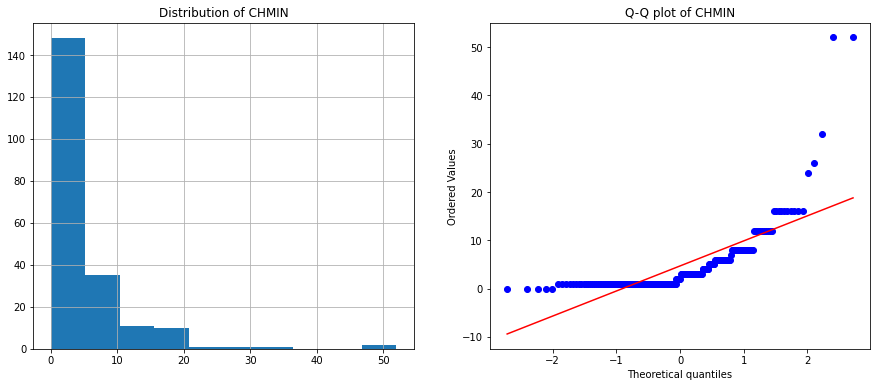

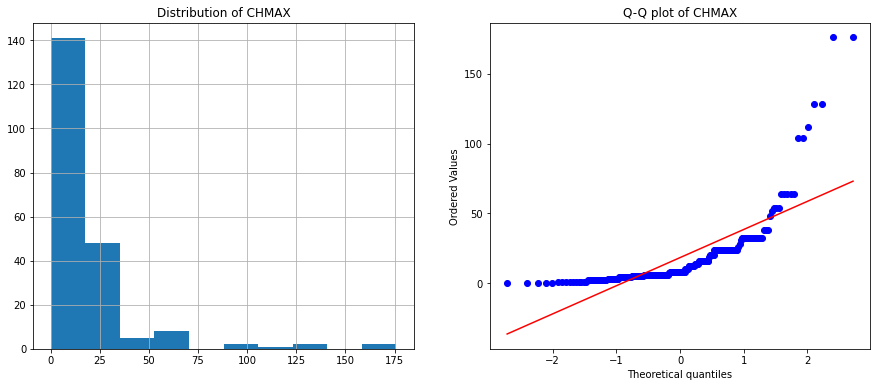

In [158]:
# plotting the Q-Q plot

import pylab 
import scipy.stats as stats


for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    
    plt.figure(figsize=(15,6))

    plt.subplot(1, 2, 1)
    df[var].hist()
    plt.title('Distribution of '+ var)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of '+ var)

    plt.show()